<a href="https://colab.research.google.com/github/Sanjay1802/Machine-Learning/blob/main/Covid_19_ForecastProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Link : https://drive.google.com/file/d/1eo3wijX7SDv6HRX2K51kPJRE0VrnybVj/view?usp=sharing

In [4]:
# Load the data
df=pd.read_csv("/content/covid_19_clean_complete.csv")
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [5]:
df.head(60)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.060800,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.416100,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.069100,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.473500,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.868800,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [6]:
df[df["Country/Region"]=="India"]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,NaN,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,NaN,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,NaN,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,NaN,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia
...,...,...,...,...,...,...,...,...,...,...
47892,NaN,India,20.593684,78.96288,2020-07-23,1288108,30601,817209,440298,South-East Asia
48153,NaN,India,20.593684,78.96288,2020-07-24,1337024,31358,849432,456234,South-East Asia
48414,NaN,India,20.593684,78.96288,2020-07-25,1385635,32060,885573,468002,South-East Asia
48675,NaN,India,20.593684,78.96288,2020-07-26,1435616,32771,917568,485277,South-East Asia


In [7]:

df.shape

(49068, 10)

In [8]:
df.Date.value_counts()

,count
Date,
2020-01-22,261
2020-01-23,261
2020-01-24,261
2020-01-25,261
2020-01-26,261
...,...
2020-07-23,261
2020-07-24,261
2020-07-25,261


# We have total 188 days of data starting from 22nd Jan to 27th July

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [11]:
df['Date']=pd.to_datetime(df['Date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [13]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [14]:
# Grouping all countries based on their states so we will have 1 data for 1 country for 1 date
top=df[df["Date"]=="2020-01-22"]
top.head(60)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.060800,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.416100,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.069100,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.473500,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.868800,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [15]:
top.groupby(by="Country/Region")[["Confirmed","Deaths","Recovered","Active"]].sum().reset_index()

,Country/Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,0,0,0,0
1,Albania,0,0,0,0
2,Algeria,0,0,0,0
3,Andorra,0,0,0,0
4,Angola,0,0,0,0
...,...,...,...,...,...
182,West Bank and Gaza,0,0,0,0
183,Western Sahara,0,0,0,0
184,Yemen,0,0,0,0
185,Zambia,0,0,0,0


In [16]:
df=df.groupby(by=["Date","Country/Region"])[["Confirmed","Deaths","Recovered","Active",]].sum().reset_index()
df  # New df after groupping all countries together

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-22,Albania,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0
4,2020-01-22,Angola,0,0,0,0
...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791
35152,2020-07-27,Western Sahara,10,1,8,1
35153,2020-07-27,Yemen,1691,483,833,375
35154,2020-07-27,Zambia,4552,140,2815,1597


# Find out total confirmed , Death , Recovered and Active cases in all 187 countries for particular dates

In [17]:
confirmed=df.groupby(by="Date")["Confirmed"].sum().reset_index()
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


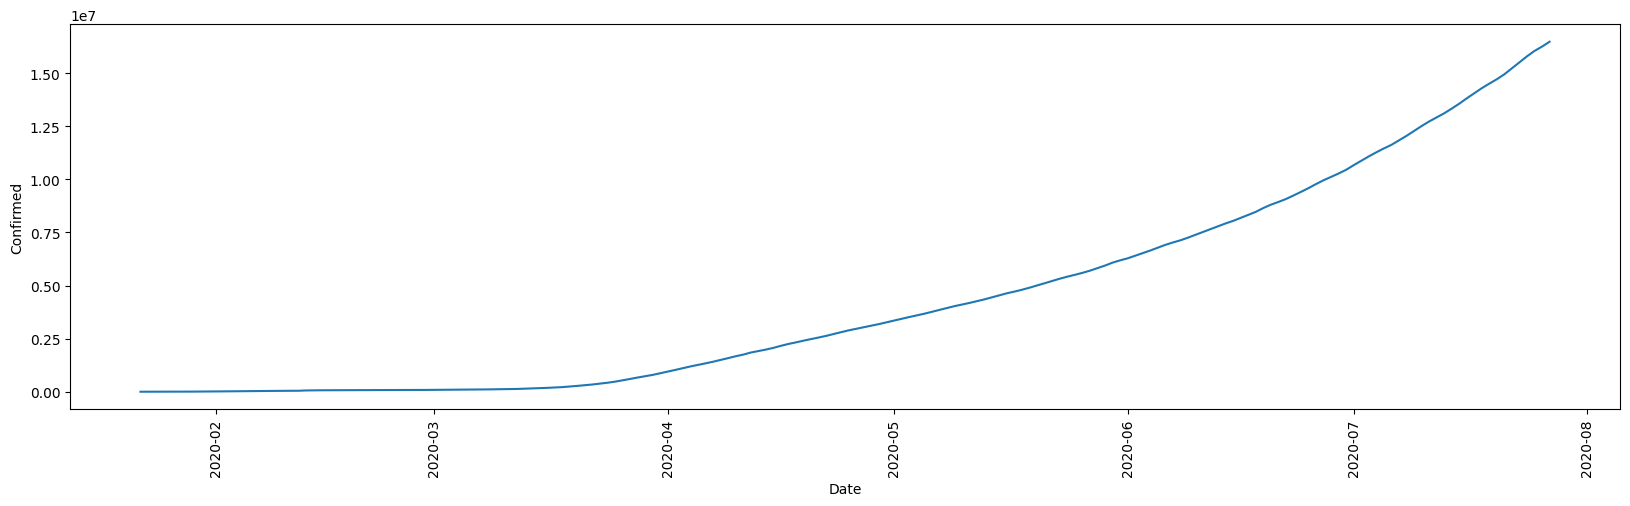

In [18]:
plt.figure(figsize=(20,5))
sns.lineplot(data=confirmed , x="Date", y="Confirmed")
plt.xticks(rotation=90)
plt.show()

In [19]:
Active=df.groupby(by="Date")["Active"].sum().reset_index()
Active

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


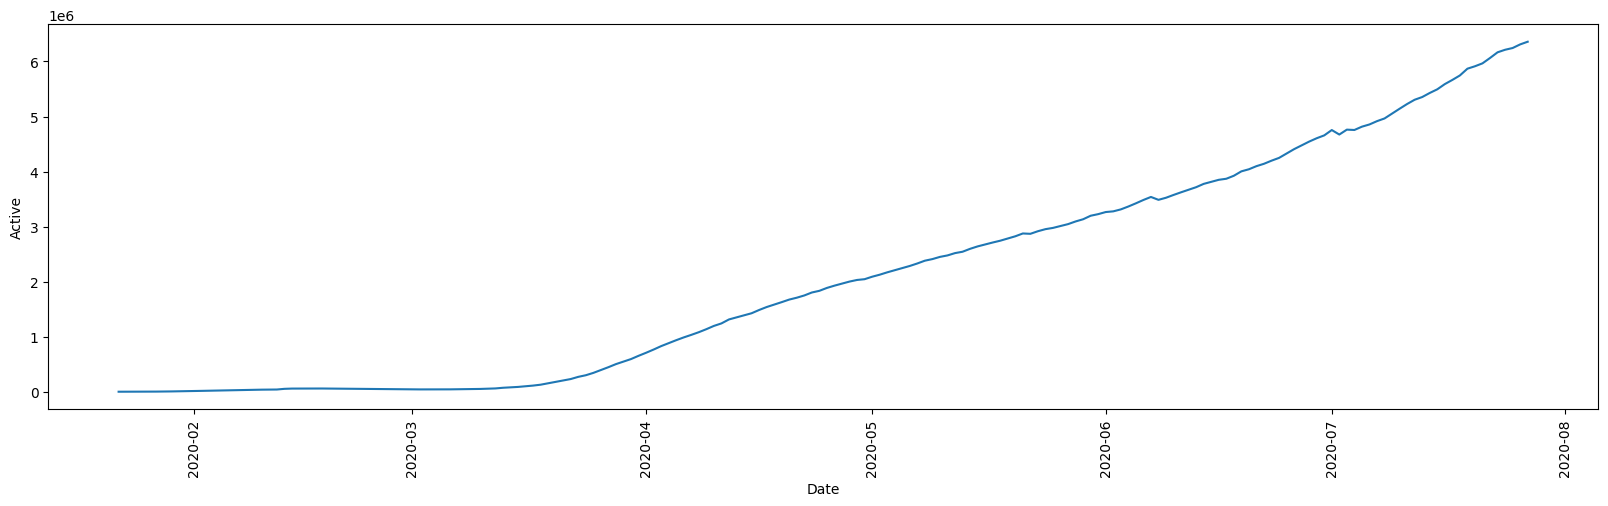

In [20]:
plt.figure(figsize=(20,5))
sns.lineplot(data=Active , x="Date", y="Active")
plt.xticks(rotation=90)
plt.show()

In [21]:
Deaths=df.groupby(by="Date")["Deaths"].sum().reset_index()
Deaths

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


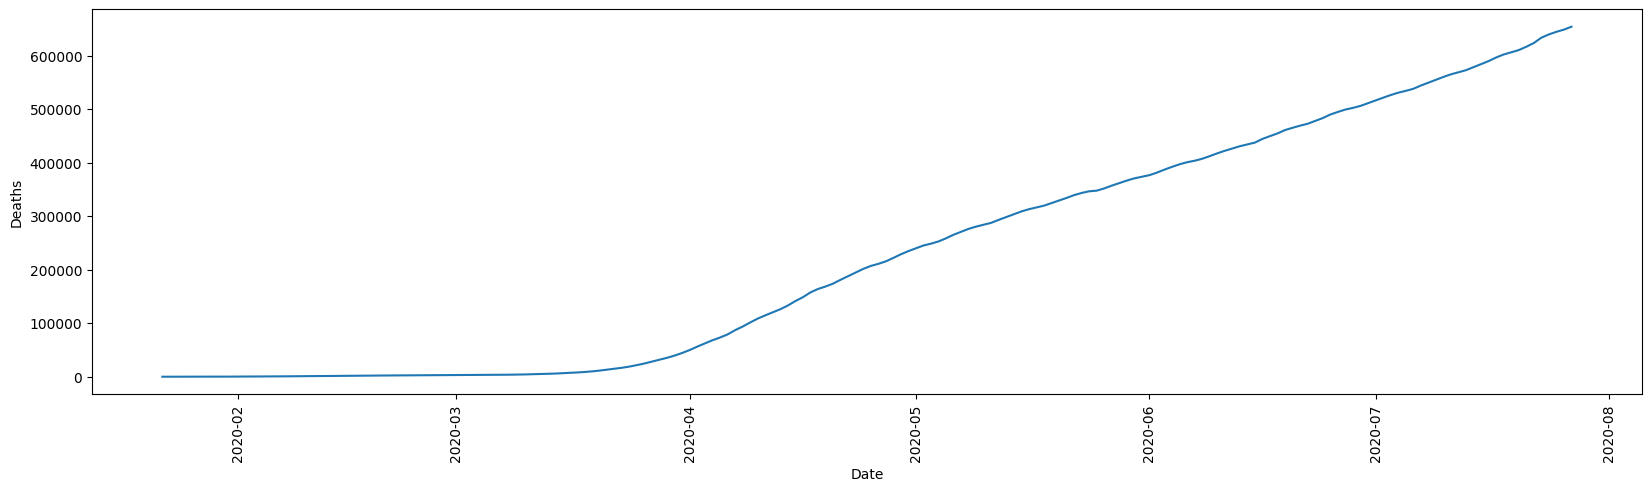

In [22]:
plt.figure(figsize=(20,5))
sns.lineplot(data=Deaths , x="Date", y="Deaths")
plt.xticks(rotation=90)
plt.show()

In [23]:
Recovered=df.groupby(by="Date")["Recovered"].sum().reset_index()
Recovered

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


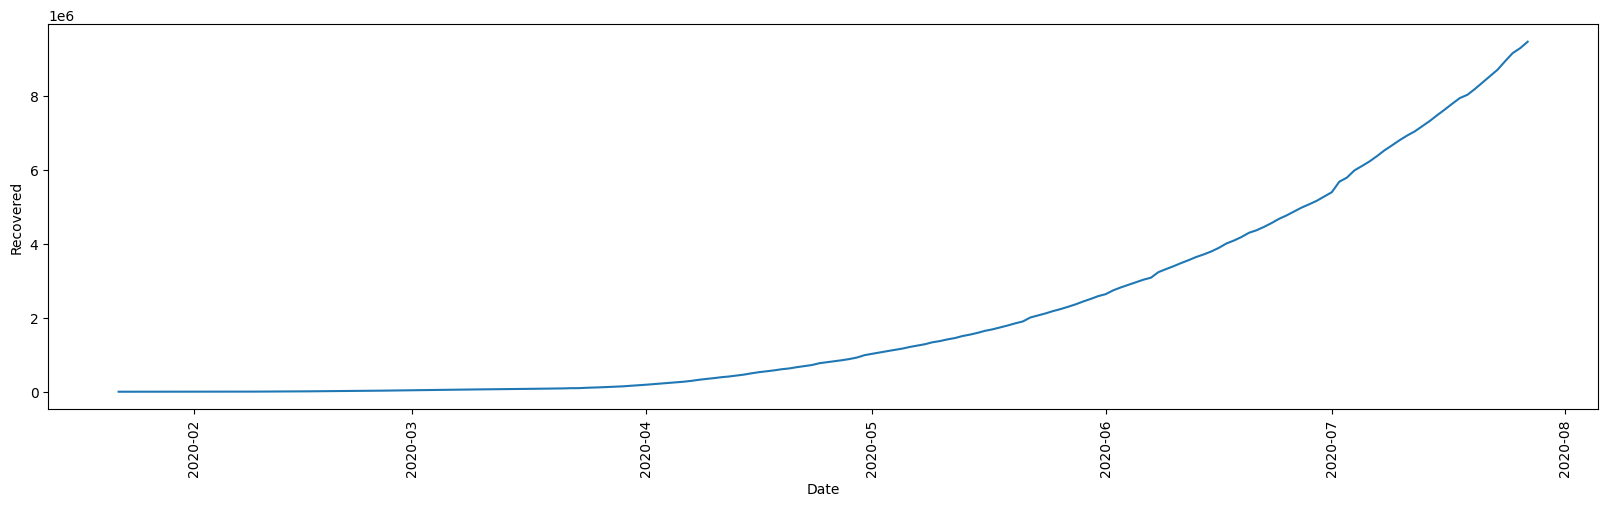

In [24]:
plt.figure(figsize=(20,5))
sns.lineplot(data=Recovered , x="Date", y="Recovered")
plt.xticks(rotation=90)
plt.show()

# Top 10 contries with most Active , Recovered , Confirmed and death cases

In [25]:
# Use Bar chart to compare
country_active = df.groupby(by='Country/Region')['Active'].sum().reset_index()
country_active

,Country/Region,Active
0,Afghanistan,1089052
1,Albania,72117
2,Algeria,345886
3,Andorra,19907
4,Angola,15011
...,...,...
182,West Bank and Gaza,170967
183,Western Sahara,190
184,Yemen,25694
185,Zambia,43167


In [26]:
# Sort the data in descending order
top10 = country_active.sort_values(by='Active', ascending=False).head(10)
top10

,Country/Region,Active
173,US,156981121
23,Brazil,31094060
177,United Kingdom,22624595
138,Russia,19668578
79,India,15987913
61,France,10980287
157,Spain,9277432
32,Canada,8656985
132,Peru,7748957
85,Italy,7363518


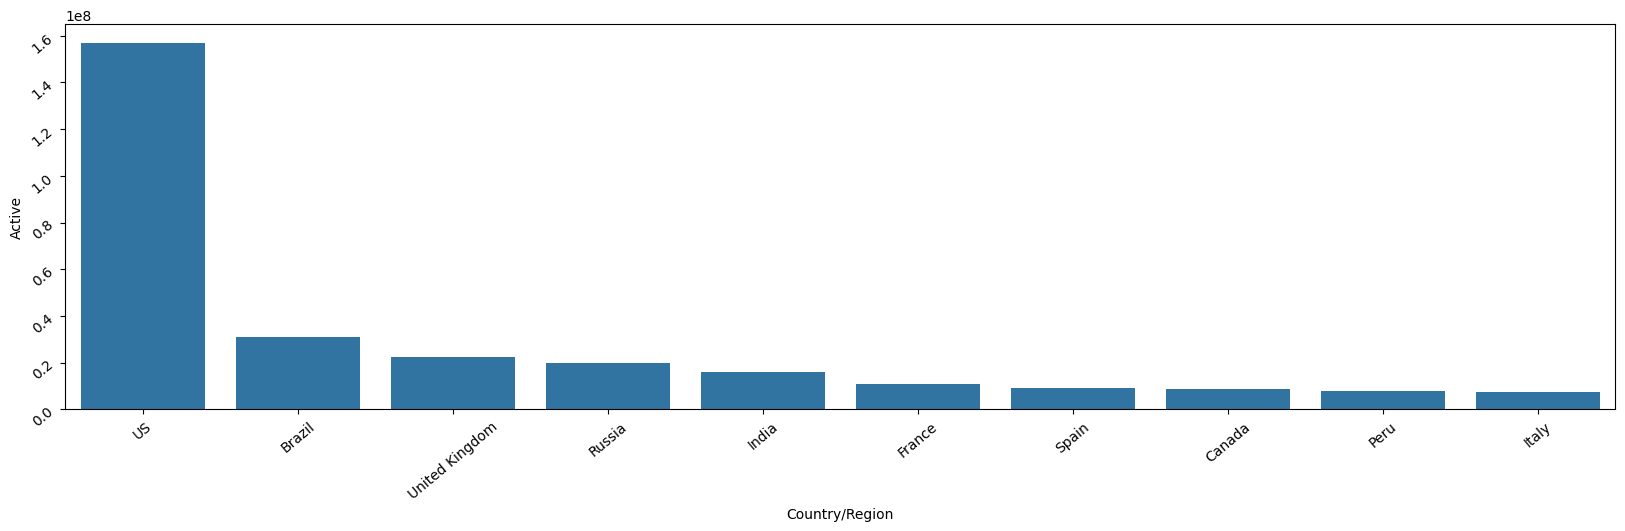

In [27]:
plt.figure(figsize=(20,5))
sns.barplot(x='Country/Region', y='Active', data=top10)
plt.xticks(rotation=40)
plt.yticks(rotation=40)
plt.show()

# Compare the Death rate of india vs china vs US against Date column

Text(0, 0.5, 'No of Deaths')

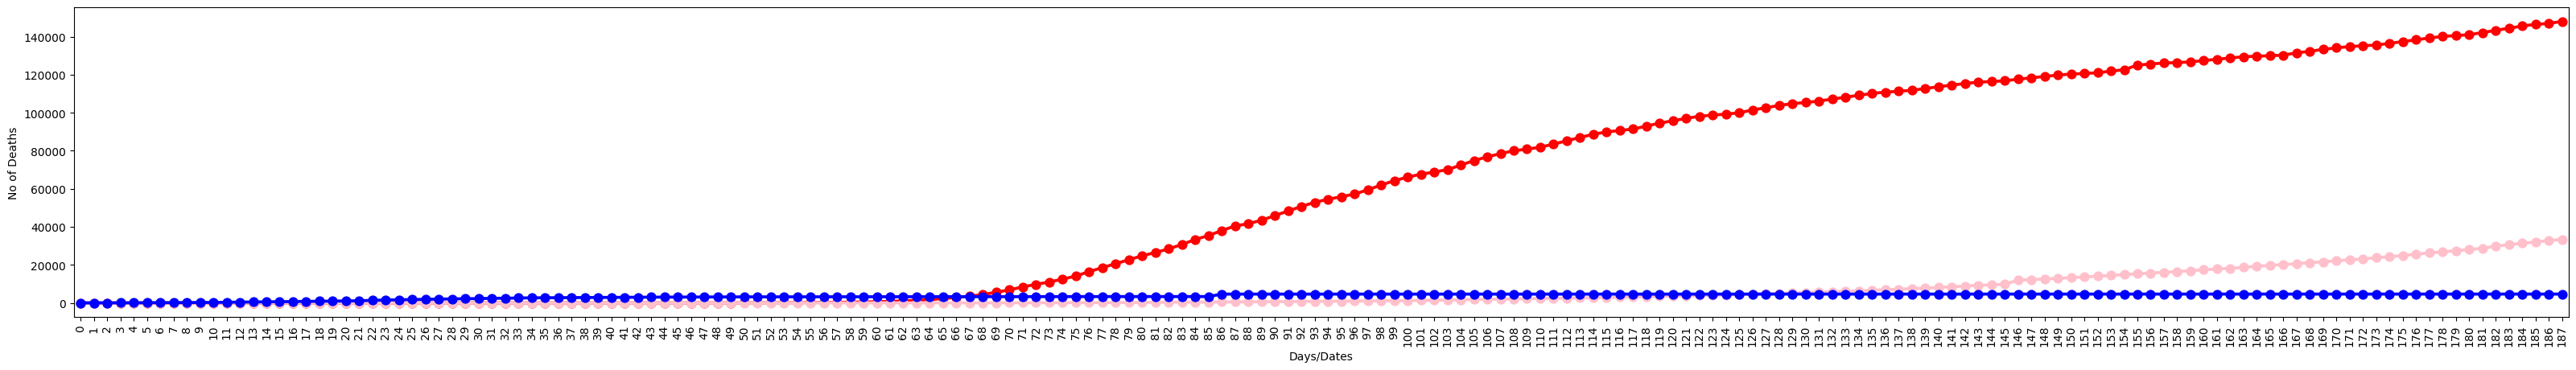

In [28]:
# India data of death
India=df[df["Country/Region"]=="India"]
India_data =India.groupby(by="Date")["Deaths"].sum().reset_index()

# US data of death
US=df[df["Country/Region"]=="US"]
US_data =US.groupby(by="Date")["Deaths"].sum().reset_index()

# China data of death
China=df[df["Country/Region"]=="China"]
China_data =China.groupby(by="Date")["Deaths"].sum().reset_index()

plt.figure(figsize=(40,5))

# Pointplot 3 times to plot all 3 country death data together
sns.pointplot(x=US_data.index , y=US_data.Deaths , color="Red")
sns.pointplot(x=India_data.index , y=India_data.Deaths , color="Pink")
sns.pointplot(x=China_data.index , y=China_data.Deaths , color="Blue")

plt.xlabel("Days/Dates")
plt.xticks(rotation=90)
plt.ylabel("No of Deaths")

# Apply Time Series model to forecast the Death , Active , recovered and Confirmed Cases

In [29]:
confirmed  # 22nd Jan to 27th July
confirmed.columns=["ds","y"]
confirmed

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [30]:
from prophet import Prophet
fb_prophet_model = Prophet()

In [31]:
# Train the model
fb_prophet_model.fit(confirmed)  # Directly pass your data

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
# Making forecasting for next 15 days after 27th July 2020 till 11 August 2020
future = fb_prophet_model.make_future_dataframe(periods=15)  # Period means for next how many days
forecast_values = fb_prophet_model.predict(future)
forecast_values.tail(18)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
185,2020-07-25,1.572508e+07,1.563418e+07,1.584360e+07,1.572508e+07,1.572508e+07,13750.326871,13750.326871,13750.326871,13750.326871,13750.326871,13750.326871,0.0,0.0,0.0,1.573883e+07
186,2020-07-26,1.592907e+07,1.583223e+07,1.604456e+07,1.592907e+07,1.592907e+07,7298.791978,7298.791978,7298.791978,7298.791978,7298.791978,7298.791978,0.0,0.0,0.0,1.593637e+07
187,2020-07-27,1.613306e+07,1.602370e+07,1.623688e+07,1.613306e+07,1.613306e+07,-2102.755455,-2102.755455,-2102.755455,-2102.755455,-2102.755455,-2102.755455,0.0,0.0,0.0,1.613096e+07
188,2020-07-28,1.633705e+07,1.620770e+07,1.642438e+07,1.633705e+07,1.633705e+07,-16846.239961,-16846.239961,-16846.239961,-16846.239961,-16846.239961,-16846.239961,0.0,0.0,0.0,1.632021e+07
189,2020-07-29,1.654104e+07,1.642251e+07,1.663858e+07,1.653951e+07,1.654314e+07,-11063.558307,-11063.558307,-11063.558307,-11063.558307,-11063.558307,-11063.558307,0.0,0.0,0.0,1.652998e+07
190,2020-07-30,1.674503e+07,1.663216e+07,1.684987e+07,1.673907e+07,1.675230e+07,-1117.543863,-1117.543863,-1117.543863,-1117.543863,-1117.543863,-1117.543863,0.0,0.0,0.0,1.674392e+07
191,2020-07-31,1.694902e+07,1.684380e+07,1.707425e+07,1.693500e+07,1.696184e+07,10080.978737,10080.978737,10080.978737,10080.978737,10080.978737,10080.978737,0.0,0.0,0.0,1.695911e+07
192,2020-08-01,1.715301e+07,1.705523e+07,1.728091e+07,1.713034e+07,1.717477e+07,13750.326871,13750.326871,13750.326871,13750.326871,13750.326871,13750.326871,0.0,0.0,0.0,1.716677e+07
193,2020-08-02,1.735701e+07,1.725761e+07,1.747669e+07,1.732558e+07,1.738644e+07,7298.791978,7298.791978,7298.791978,7298.791978,7298.791978,7298.791978,0.0,0.0,0.0,1.736430e+07
194,2020-08-03,1.756100e+07,1.744339e+07,1.767210e+07,1.751771e+07,1.759912e+07,-2102.755455,-2102.755455,-2102.755455,-2102.755455,-2102.755455,-2102.755455,0.0,0.0,0.0,1.755889e+07


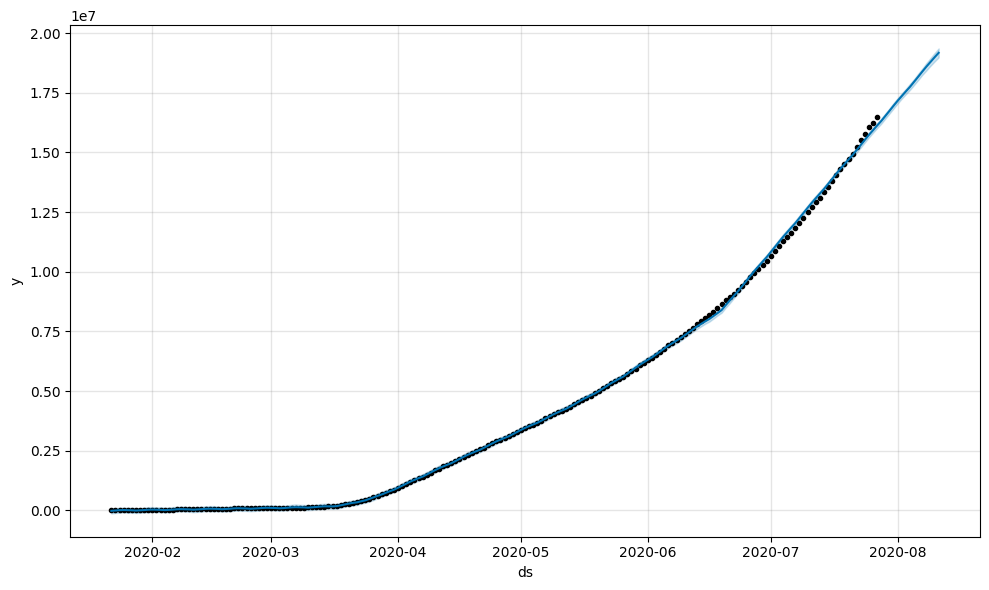

In [33]:
forecast_values[['ds','yhat','yhat_upper','yhat_lower']]
'''
ds:
This column contains the dates for which the predictions have been made. It stands for "date stamp."

yhat:
This is the predicted value (forecast) for the given date in the ds column. It represents the model's best estimate for that point in time.

yhat_upper:
This column represents the upper bound of the predicted value, which indicates the higher end of the confidence interval.
It suggests that the actual value is unlikely to exceed this amount, giving you an idea of the prediction's uncertainty.

yhat_lower:
This column represents the lower bound of the predicted value, indicating the lower end of the confidence interval. It suggests that the actual value is unlikely to be lower than this amount.
'''
fb_prophet_model.plot(forecast_values)
plt.show()

In [35]:
Deaths  # 22nd Jan to 27th July
Deaths.columns=["ds","y"]
Deaths

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [36]:
from prophet import Prophet
fb_prophet_model = Prophet()

In [37]:
# Train the model
fb_prophet_model.fit(Deaths)  # Directly pass your data

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
# Making forecasting for next 15 days after 27th July 2020 till 11 August 2020
future = fb_prophet_model.make_future_dataframe(periods=15)  # Period means for next how many days
forecast_values = fb_prophet_model.predict(future)
forecast_values.tail(18)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
185,2020-07-25,637955.689563,636681.511355,640546.855859,637955.689563,637955.689563,726.889465,726.889465,726.889465,726.889465,726.889465,726.889465,0.0,0.0,0.0,638682.579028
186,2020-07-26,642985.098503,640822.448519,644844.373836,642985.098503,642985.098503,-165.600459,-165.600459,-165.600459,-165.600459,-165.600459,-165.600459,0.0,0.0,0.0,642819.498044
187,2020-07-27,648014.507443,645149.417954,649112.909278,648014.507443,648014.507443,-904.694278,-904.694278,-904.694278,-904.694278,-904.694278,-904.694278,0.0,0.0,0.0,647109.813166
188,2020-07-28,653043.916383,650236.688561,654316.344820,653043.916383,653043.916383,-728.343117,-728.343117,-728.343117,-728.343117,-728.343117,-728.343117,0.0,0.0,0.0,652315.573266
189,2020-07-29,658073.325323,655957.306492,660008.830261,658039.064485,658162.386667,-191.187755,-191.187755,-191.187755,-191.187755,-191.187755,-191.187755,0.0,0.0,0.0,657882.137569
190,2020-07-30,663102.734264,661462.967439,665468.175423,662887.945947,663405.953283,388.672065,388.672065,388.672065,388.672065,388.672065,388.672065,0.0,0.0,0.0,663491.406328
191,2020-07-31,668132.143204,666829.003961,671297.728241,667565.762051,668715.306461,874.264079,874.264079,874.264079,874.264079,874.264079,874.264079,0.0,0.0,0.0,669006.407283
192,2020-08-01,673161.552144,671610.916335,676240.483550,672349.427278,674234.138090,726.889465,726.889465,726.889465,726.889465,726.889465,726.889465,0.0,0.0,0.0,673888.441609
193,2020-08-02,678190.961084,675575.749932,680670.193748,676997.501631,679732.620930,-165.600459,-165.600459,-165.600459,-165.600459,-165.600459,-165.600459,0.0,0.0,0.0,678025.360624
194,2020-08-03,683220.370024,679522.257792,685158.100937,681560.780390,685287.053714,-904.694278,-904.694278,-904.694278,-904.694278,-904.694278,-904.694278,0.0,0.0,0.0,682315.675746


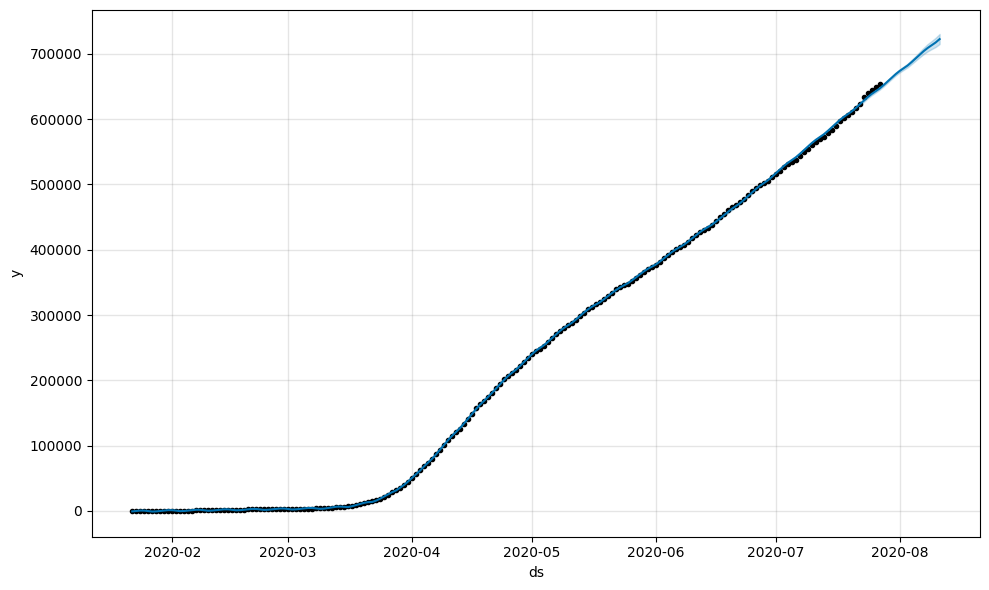

In [39]:
forecast_values[['ds','yhat','yhat_upper','yhat_lower']]
'''
ds:
This column contains the dates for which the predictions have been made. It stands for "date stamp."

yhat:
This is the predicted value (forecast) for the given date in the ds column. It represents the model's best estimate for that point in time.

yhat_upper:
This column represents the upper bound of the predicted value, which indicates the higher end of the confidence interval.
It suggests that the actual value is unlikely to exceed this amount, giving you an idea of the prediction's uncertainty.

yhat_lower:
This column represents the lower bound of the predicted value, indicating the lower end of the confidence interval. It suggests that the actual value is unlikely to be lower than this amount.
'''
fb_prophet_model.plot(forecast_values)
plt.show()

In [41]:
Active  # 22nd Jan to 27th July
Active.columns=["ds","y"]
Active

,ds,y
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


In [42]:
from prophet import Prophet
fb_prophet_model = Prophet()

In [43]:
# Train the model
fb_prophet_model.fit(Active)  # Directly pass your data

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:
# Making forecasting for next 15 days after 27th July 2020 till 11 August 2020
future = fb_prophet_model.make_future_dataframe(periods=15)  # Period means for next how many days
forecast_values = fb_prophet_model.predict(future)
forecast_values.tail(18)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
185,2020-07-25,6.172485e+06,6.130556e+06,6.224387e+06,6.172485e+06,6.172485e+06,3128.006715,3128.006715,3128.006715,3128.006715,3128.006715,3128.006715,0.0,0.0,0.0,6.175613e+06
186,2020-07-26,6.234752e+06,6.193956e+06,6.286419e+06,6.234752e+06,6.234752e+06,8151.913171,8151.913171,8151.913171,8151.913171,8151.913171,8151.913171,0.0,0.0,0.0,6.242904e+06
187,2020-07-27,6.297020e+06,6.253226e+06,6.343387e+06,6.297020e+06,6.297020e+06,-365.533717,-365.533717,-365.533717,-365.533717,-365.533717,-365.533717,0.0,0.0,0.0,6.296654e+06
188,2020-07-28,6.359287e+06,6.310901e+06,6.400279e+06,6.359287e+06,6.359287e+06,-5866.940936,-5866.940936,-5866.940936,-5866.940936,-5866.940936,-5866.940936,0.0,0.0,0.0,6.353420e+06
189,2020-07-29,6.421555e+06,6.367853e+06,6.457215e+06,6.420448e+06,6.422386e+06,-5734.815309,-5734.815309,-5734.815309,-5734.815309,-5734.815309,-5734.815309,0.0,0.0,0.0,6.415820e+06
190,2020-07-30,6.483822e+06,6.435804e+06,6.529102e+06,6.480459e+06,6.486711e+06,-2543.415441,-2543.415441,-2543.415441,-2543.415441,-2543.415441,-2543.415441,0.0,0.0,0.0,6.481279e+06
191,2020-07-31,6.546090e+06,6.502856e+06,6.596454e+06,6.539296e+06,6.551604e+06,3230.785517,3230.785517,3230.785517,3230.785517,3230.785517,3230.785517,0.0,0.0,0.0,6.549320e+06
192,2020-08-01,6.608357e+06,6.562700e+06,6.659247e+06,6.597921e+06,6.618887e+06,3128.006715,3128.006715,3128.006715,3128.006715,3128.006715,3128.006715,0.0,0.0,0.0,6.611485e+06
193,2020-08-02,6.670624e+06,6.629639e+06,6.728566e+06,6.656308e+06,6.685290e+06,8151.913171,8151.913171,8151.913171,8151.913171,8151.913171,8151.913171,0.0,0.0,0.0,6.678776e+06
194,2020-08-03,6.732892e+06,6.679125e+06,6.783174e+06,6.714690e+06,6.751272e+06,-365.533717,-365.533717,-365.533717,-365.533717,-365.533717,-365.533717,0.0,0.0,0.0,6.732526e+06


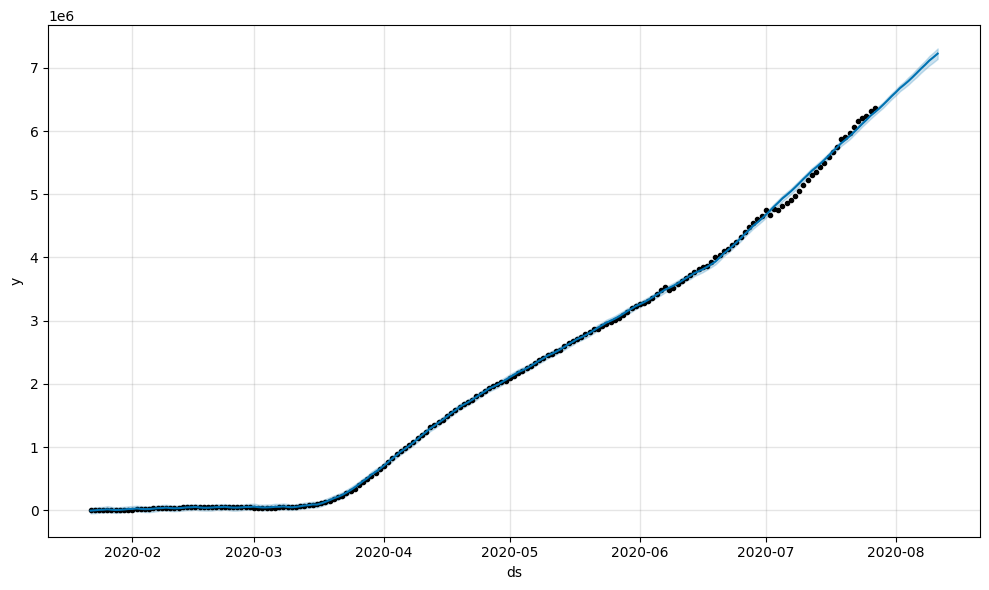

In [45]:
forecast_values[['ds','yhat','yhat_upper','yhat_lower']]
'''
ds:
This column contains the dates for which the predictions have been made. It stands for "date stamp."

yhat:
This is the predicted value (forecast) for the given date in the ds column. It represents the model's best estimate for that point in time.

yhat_upper:
This column represents the upper bound of the predicted value, which indicates the higher end of the confidence interval.
It suggests that the actual value is unlikely to exceed this amount, giving you an idea of the prediction's uncertainty.

yhat_lower:
This column represents the lower bound of the predicted value, indicating the lower end of the confidence interval. It suggests that the actual value is unlikely to be lower than this amount.
'''
fb_prophet_model.plot(forecast_values)
plt.show()

In [46]:
Recovered  # 22nd Jan to 27th July
Recovered.columns=["ds","y"]
Recovered

,ds,y
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [50]:
from prophet import Prophet
fb_prophet_model = Prophet()

In [51]:
# Train the model
fb_prophet_model.fit(Recovered)  # Directly pass your data

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [52]:
# Making forecasting for next 15 days after 27th July 2020 till 11 August 2020
future = fb_prophet_model.make_future_dataframe(periods=15)  # Period means for next how many days
forecast_values = fb_prophet_model.predict(future)
forecast_values.tail(18)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
185,2020-07-25,8.911749e+06,8.842639e+06,9.001047e+06,8.911749e+06,8.911749e+06,9699.442818,9699.442818,9699.442818,9699.442818,9699.442818,9699.442818,0.0,0.0,0.0,8.921448e+06
186,2020-07-26,9.048307e+06,8.963985e+06,9.126085e+06,9.048307e+06,9.048307e+06,-883.479296,-883.479296,-883.479296,-883.479296,-883.479296,-883.479296,0.0,0.0,0.0,9.047423e+06
187,2020-07-27,9.184865e+06,9.099351e+06,9.259585e+06,9.184865e+06,9.184865e+06,-941.312583,-941.312583,-941.312583,-941.312583,-941.312583,-941.312583,0.0,0.0,0.0,9.183923e+06
188,2020-07-28,9.321423e+06,9.232743e+06,9.385482e+06,9.321423e+06,9.321423e+06,-10384.965344,-10384.965344,-10384.965344,-10384.965344,-10384.965344,-10384.965344,0.0,0.0,0.0,9.311038e+06
189,2020-07-29,9.457981e+06,9.378131e+06,9.528985e+06,9.457557e+06,9.459006e+06,-4840.633687,-4840.633687,-4840.633687,-4840.633687,-4840.633687,-4840.633687,0.0,0.0,0.0,9.453140e+06
190,2020-07-30,9.594538e+06,9.510858e+06,9.680482e+06,9.591416e+06,9.598461e+06,1254.797967,1254.797967,1254.797967,1254.797967,1254.797967,1254.797967,0.0,0.0,0.0,9.595793e+06
191,2020-07-31,9.731096e+06,9.660250e+06,9.823654e+06,9.725186e+06,9.739590e+06,6096.150124,6096.150124,6096.150124,6096.150124,6096.150124,6096.150124,0.0,0.0,0.0,9.737193e+06
192,2020-08-01,9.867654e+06,9.795212e+06,9.961039e+06,9.854918e+06,9.880534e+06,9699.442818,9699.442818,9699.442818,9699.442818,9699.442818,9699.442818,0.0,0.0,0.0,9.877354e+06
193,2020-08-02,1.000421e+07,9.918754e+06,1.008795e+07,9.984242e+06,1.002285e+07,-883.479296,-883.479296,-883.479296,-883.479296,-883.479296,-883.479296,0.0,0.0,0.0,1.000333e+07
194,2020-08-03,1.014077e+07,1.005456e+07,1.022397e+07,1.011357e+07,1.016710e+07,-941.312583,-941.312583,-941.312583,-941.312583,-941.312583,-941.312583,0.0,0.0,0.0,1.013983e+07


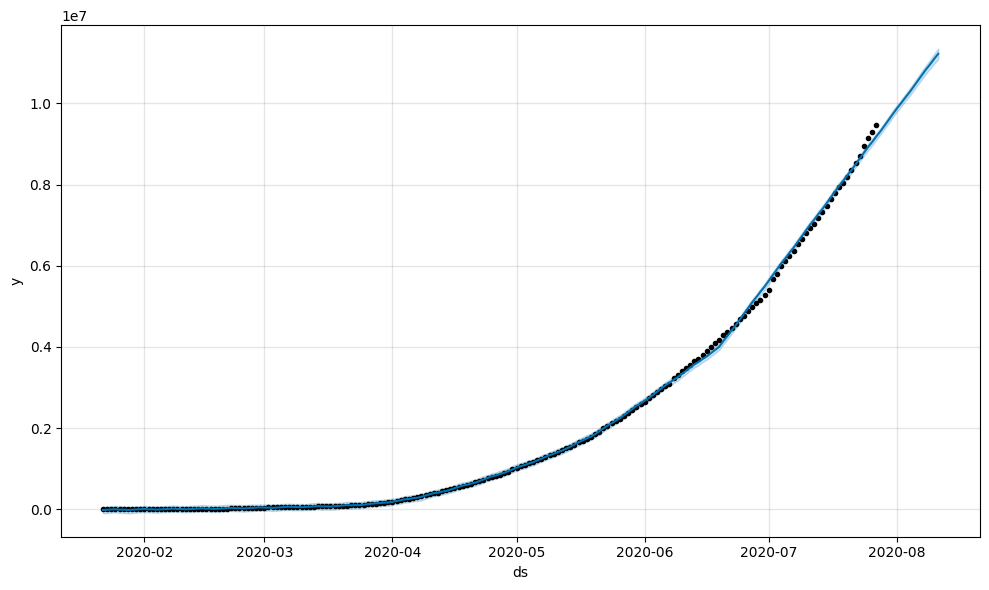

In [53]:
forecast_values[['ds','yhat','yhat_upper','yhat_lower']]
'''
ds:
This column contains the dates for which the predictions have been made. It stands for "date stamp."

yhat:
This is the predicted value (forecast) for the given date in the ds column. It represents the model's best estimate for that point in time.

yhat_upper:
This column represents the upper bound of the predicted value, which indicates the higher end of the confidence interval.
It suggests that the actual value is unlikely to exceed this amount, giving you an idea of the prediction's uncertainty.

yhat_lower:
This column represents the lower bound of the predicted value, indicating the lower end of the confidence interval. It suggests that the actual value is unlikely to be lower than this amount.
'''
fb_prophet_model.plot(forecast_values)
plt.show()

In [54]:
import plotly
import plotly.express as px

In [55]:
world_data = df.groupby(by="Country/Region")[["Confirmed" ,"Active" , "Deaths" ,"Recovered"]].sum().reset_index()
world_data

,Country/Region,Confirmed,Active,Deaths,Recovered
0,Afghanistan,1936390,1089052,49098,798240
1,Albania,196702,72117,5708,118877
2,Algeria,1179755,345886,77972,755897
3,Andorra,94404,19907,5423,69074
4,Angola,22662,15011,1078,6573
...,...,...,...,...,...
182,West Bank and Gaza,233461,170967,1370,61124
183,Western Sahara,901,190,63,648
184,Yemen,67180,25694,17707,23779
185,Zambia,129421,43167,2643,83611


In [56]:
figure= px.choropleth(world_data , locations="Country/Region" ,locationmode="country names" , color="Active",
                      hover_name="Country/Region",title="Countries with most Active cases")
figure.show()

In [60]:
fig = px.scatter_3d(
    world_data,
    x="Confirmed",
    y="Recovered",
    z="Active",
    color="Active",
    hover_name="Country/Region",
    title="3D Visualization of COVID-19 Active Cases by Country"
)
fig.show()